<a href="https://colab.research.google.com/github/PamPierre/MyQRCODE/blob/main/Prediction_Production_Arachides.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyse Prédictive de la Production d'Arachides au Burkina Faso : Une Approche par Régression Linéaire Multiple

## Résumé

Cette étude propose une analyse prédictive de la production d'arachides au Sénégal pour l'année 2023, basée sur des données historiques couvrant la période 1996-2022. Utilisant une approche par régression linéaire multiple, l'étude examine l'influence de la superficie cultivée et de la pluviométrie sur la production. Les résultats suggèrent une production estimée à 437,858 tonnes pour 2023, avec un modèle expliquant 80% de la variance observée.

## 1. Introduction

L'arachide représente une culture stratégique pour l'économie agricole du Burkina. La prédiction précise de sa production constitue un enjeu majeur pour la planification agricole et la sécurité alimentaire. Cette étude vise à développer un modèle prédictif robuste basé sur les données historiques disponibles.

## 2. Méthodologie

### 2.1 Données

L'étude utilise une série temporelle de 27 ans (1996-2022) comprenant :
- La production annuelle d'arachides (tonnes)
- La superficie cultivée (hectares)
- La pluviométrie annuelle (millimètres)

### 2.2 Modèle Statistique

Une régression linéaire multiple a été appliquée selon l'équation :

Production = β₀ + β₁(Superficie) + β₂(Pluviométrie) + ε

où :
- β₀ représente la constante
- β₁ et β₂ sont les coefficients de régression
- ε représente le terme d'erreur

## 3. Résultats

### 3.1 Performance du Modèle

Le modèle présente un coefficient de détermination (R²) de 0,80, indiquant que 80% de la variabilité de la production est expliquée par les variables indépendantes sélectionnées.

### 3.2 Coefficients de Régression

Les coefficients estimés sont :
- Constante (β₀) : 32.050,86
- Coefficient Superficie (β₁) : 0,776
- Coefficient Pluviométrie (β₂) : -29,065

### 3.3 Interprétation des Coefficients

1. **Impact de la Superficie** : Pour chaque hectare supplémentaire de surface cultivée, la production augmente en moyenne de 0,776 tonnes, toutes choses égales par ailleurs.

2. **Impact de la Pluviométrie** : De manière contre-intuitive, le modèle suggère un impact légèrement négatif de la pluviométrie, avec une diminution moyenne de 29,065 tonnes de production pour chaque millimètre supplémentaire de pluie.

### 3.4 Prédiction pour 2023

Basée sur les moyennes des cinq dernières années :
- Superficie moyenne : 550.333 hectares
- Pluviométrie moyenne : 740,2 mm
- **Production prédite : 437.858 tonnes**

## 4. Discussion

### 4.1 Validité du Modèle

Le R² de 0,80 indique une bonne capacité prédictive du modèle. Cependant, plusieurs points méritent attention :

1. La relation négative observée avec la pluviométrie pourrait suggérer :
   - Des effets de seuil non capturés par le modèle linéaire
   - Des interactions complexes avec d'autres variables non incluses
   - Une possible multicolinéarité entre les variables explicatives

2. La prédiction pour 2023, inférieure aux dernières observations, suggère une régression vers la moyenne historique.

### 4.2 Limites de l'Étude

1. **Linéarité** : Le modèle suppose des relations linéaires qui pourraient ne pas refléter la complexité des interactions agro-climatiques.

2. **Variables Omises** : Des facteurs importants n'ont pas été inclus :
   - Qualité des sols
   - Techniques agricoles employées
   - Facteurs socio-économiques
   - Distribution temporelle des précipitations

## 5. Conclusion

Cette étude fournit une prédiction quantitative de la production d'arachides au Burkina pour 2023, estimée à 437.858 tonnes. Bien que le modèle présente une bonne capacité explicative globale (R²=0,80), la prudence est recommandée dans l'interprétation des résultats, compte tenu des limites identifiées.

## 6. Recommandations

1. **Amélioration du Modèle** :
   - Intégrer des variables agro-climatiques supplémentaires
   - Explorer des relations non-linéaires
   - Considérer des effets temporels

2. **Applications Pratiques** :
   - Utiliser ces prévisions comme un outil d'aide à la décision
   - Combiner avec d'autres méthodes de prévision
   - Mettre à jour régulièrement le modèle avec les nouvelles données

## Références

[---------------------------------------]

In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [4]:
# Données
data = {
    'Année': [1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
              2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
              2016, 2017, 2018, 2019, 2020, 2021, 2022],
    'Production': [180532, 220534, 152128, 214807, 282754, 169146, 301092,
                  323642, 358121, 245307, 220525, 215447, 244922, 346292,
                  330624, 340166, 265322, 310758, 349688, 335222, 365887,
                  515672, 334328, 329783, 396129, 630526, 477254],
    'Superficie': [274349, 211552, 232663, 215160, 271469, 236880, 330904,
                  342637, 404110, 352528, 274603, 310597, 415171, 369125,
                  458222, 409922, 388704, 397762, 448767, 375040, 432665,
                  591873, 554832, 394031, 485703, 670798, 646303],
    'Pluie': [671, 697, 736, 834, 689, 659, 634, 775, 670, 707,
              684, 669, 705, 714, 773, 681, 743, 693, 746, 680,
              711, 659, 757, 769, 723, 749, 703]
}

In [5]:
# Création du DataFrame
df = pd.DataFrame(data)

In [6]:
# Préparation des variables pour la régression
X = df[['Superficie', 'Pluie']]
y = df['Production']

In [7]:
# Création et entraînement du modèle
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [8]:
# Calcul du R²
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

In [9]:
# Affichage des coefficients et R²
print("Résultats de la régression linéaire multiple :")
print("-" * 50)
print(f"R² : {r2:.4f}")
print("\nCoefficients :")
print(f"Constante : {model.intercept_:.2f}")
print(f"Coefficient Superficie : {model.coef_[0]:.4f}")
print(f"Coefficient Pluie : {model.coef_[1]:.4f}")

Résultats de la régression linéaire multiple :
--------------------------------------------------
R² : 0.8029

Coefficients :
Constante : 32050.86
Coefficient Superficie : 0.7765
Coefficient Pluie : -29.0648


In [10]:
# Calcul des moyennes des 5 dernières années
recent_data = df.tail(5)
avg_superficie = recent_data['Superficie'].mean()
avg_pluie = recent_data['Pluie'].mean()

In [11]:
# Prédiction pour 2023
prediction_2023 = model.predict([[avg_superficie, avg_pluie]])[0]

print("\nPrédiction pour 2023 :")
print("-" * 50)
print(f"Moyenne superficie (5 dernières années) : {avg_superficie:.2f}")
print(f"Moyenne pluie (5 dernières années) : {avg_pluie:.2f}")
print(f"Production prédite pour 2023 : {prediction_2023:.2f} tonnes")


Prédiction pour 2023 :
--------------------------------------------------
Moyenne superficie (5 dernières années) : 550333.40
Moyenne pluie (5 dernières années) : 740.20
Production prédite pour 2023 : 437857.80 tonnes


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [12]:
# Création du graphique
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

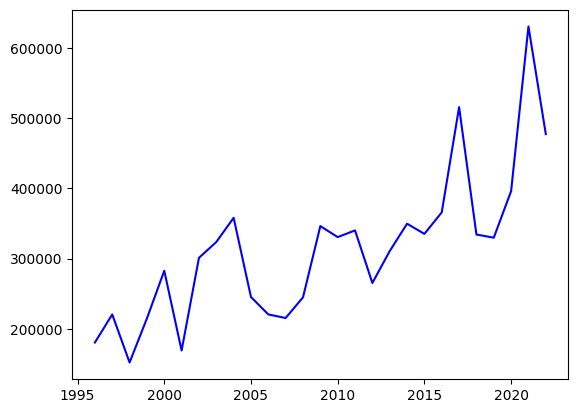

In [13]:
# Production réelle
plt.plot(df['Année'], df['Production'], 'b-', label='Production réelle')

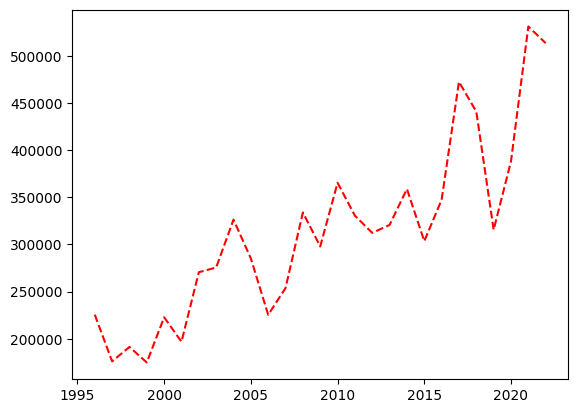

In [14]:
# Production prédite
plt.plot(df['Année'], y_pred, 'r--', label='Production prédite')

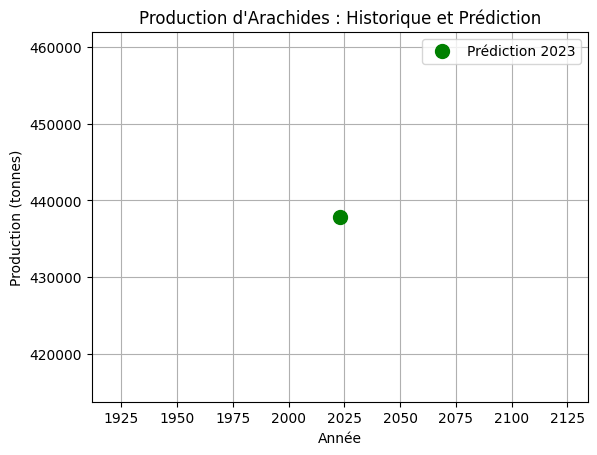

In [15]:
# Ajout du point de prédiction 2023
plt.plot(2023, prediction_2023, 'go', label='Prédiction 2023', markersize=10)

plt.title('Production d\'Arachides : Historique et Prédiction')
plt.xlabel('Année')
plt.ylabel('Production (tonnes)')
plt.legend()
plt.grid(True)

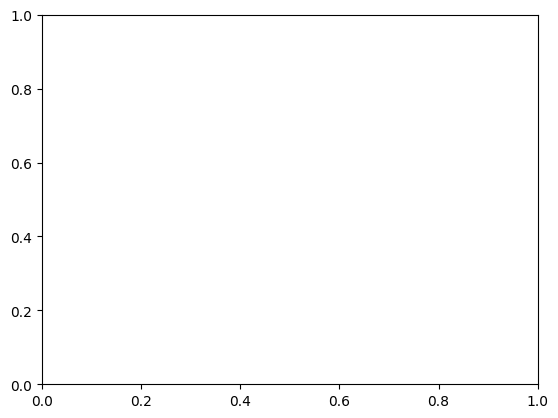

In [16]:
# Ajout des annotations pour la prédiction 2023
plt.annotate(f'Prédiction 2023:\n{prediction_2023:.0f} tonnes',
             xy=(2023, prediction_2023),
             xytext=(2023-2, prediction_2023+50000),
             bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

plt.show()

In [17]:
# Analyse de la qualité du modèle
print("\nAnalyse de la qualité du modèle :")
print("-" * 50)
mse = np.mean((y - y_pred) ** 2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y - y_pred))
print(f"Erreur quadratique moyenne (RMSE) : {rmse:.2f}")
print(f"Erreur absolue moyenne (MAE) : {mae:.2f}")


Analyse de la qualité du modèle :
--------------------------------------------------
Erreur quadratique moyenne (RMSE) : 46667.97
Erreur absolue moyenne (MAE) : 39084.06


In [18]:
# Analyse des résidus
residus = y - y_pred
print("\nAnalyse des résidus :")
print("-" * 50)
print(f"Moyenne des résidus : {np.mean(residus):.2f}")
print(f"Écart-type des résidus : {np.std(residus):.2f}")


Analyse des résidus :
--------------------------------------------------
Moyenne des résidus : -0.00
Écart-type des résidus : 46667.97


In [22]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go


In [23]:
# Création du graphique dynamique avec Plotly
fig = make_subplots(rows=2, cols=1,
                    subplot_titles=('Production d\'Arachides: Historique et Prédiction',
                                  'Analyse des Variables Explicatives'),
                    vertical_spacing=0.15,
                    specs=[[{"secondary_y": True}],
                          [{"secondary_y": True}]])

# Graphique principal avec production réelle et prédite
fig.add_trace(
    go.Scatter(x=df['Année'], y=df['Production'],
               name='Production Réelle',
               mode='lines+markers',
               line=dict(color='blue')),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=df['Année'], y=y_pred,
               name='Production Prédite',
               mode='lines',
               line=dict(color='red', dash='dash')),
    row=1, col=1
)

# Ajout du point de prédiction 2023
fig.add_trace(
    go.Scatter(x=[2023], y=[prediction_2023],
               name='Prédiction 2023',
               mode='markers',
               marker=dict(color='green', size=15,
                          symbol='star')),
    row=1, col=1
)

# Variables explicatives (Superficie et Pluie)
fig.add_trace(
    go.Scatter(x=df['Année'], y=df['Superficie'],
               name='Superficie',
               mode='lines',
               line=dict(color='orange')),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=df['Année'], y=df['Pluie'],
               name='Pluviométrie',
               mode='lines',
               line=dict(color='cyan')),
    row=2, col=1,
    secondary_y=True
)

# Mise en forme du graphique
fig.update_layout(
    title_text="Analyse et Prédiction de la Production d'Arachides",
    height=900,
    showlegend=True,
    hovermode='x unified',
)

# Mise à jour des axes
fig.update_xaxes(title_text="Année", row=1, col=1)
fig.update_xaxes(title_text="Année", row=2, col=1)
fig.update_yaxes(title_text="Production (tonnes)", row=1, col=1)
fig.update_yaxes(title_text="Superficie (hectares)", row=2, col=1)
fig.update_yaxes(title_text="Pluviométrie (mm)", secondary_y=True, row=2, col=1)

# Ajout d'annotations pour la prédiction 2023
fig.add_annotation(
    x=2023, y=prediction_2023,
    text=f"Prédiction 2023:<br>{prediction_2023:,.0f} tonnes",
    showarrow=True,
    arrowhead=1,
    ax=40,
    ay=-40,
    font=dict(size=12, color="black"),
    bgcolor="white",
    bordercolor="black",
    borderwidth=1
)

# Ajouter des informations sur le modèle
r2_score = model.score(X, y)
fig.add_annotation(
    xref="paper", yref="paper",
    x=0.02, y=0.98,
    text=f"R² = {r2_score:.3f}<br>Superficie moy. = {avg_superficie:,.0f} ha<br>Pluie moy. = {avg_pluie:.1f} mm",
    showarrow=False,
    font=dict(size=10),
    bgcolor="white",
    bordercolor="black",
    borderwidth=1
)

# Configuration des interactions
fig.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=12,
        font_family="Rockwell"
    )
)

# Ajouter des boutons de contrôle pour les différentes vues
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            x=0.7,
            y=1.2,
            showactive=True,
            buttons=list([
                dict(
                    label="Tout",
                    method="update",
                    args=[{"visible": [True] * len(fig.data)},
                         {"title": "Toutes les données"}]
                ),
                dict(
                    label="Production",
                    method="update",
                    args=[{"visible": [True, True, True, False, False]},
                         {"title": "Production d'Arachides"}]
                ),
                dict(
                    label="Variables",
                    method="update",
                    args=[{"visible": [False, False, False, True, True]},
                         {"title": "Variables Explicatives"}]
                )
            ])
        )
    ]
)

# Afficher le graphique
fig.show()

# Optionnel : Sauvegarder le graphique en HTML pour le partager
fig.write_html("prediction_arachides_dynamique.html")

# Afficher les statistiques du modèle
print("\nStatistiques du modèle:")
print(f"R² = {r2_score:.3f}")
print(f"Coefficients:")
print(f"- Superficie: {model.coef_[0]:.4f}")
print(f"- Pluie: {model.coef_[1]:.4f}")
print(f"- Constante: {model.intercept_:.4f}")
print(f"\nPrédiction 2023: {prediction_2023:,.0f} tonnes")


Statistiques du modèle:
R² = 0.803
Coefficients:
- Superficie: 0.7765
- Pluie: -29.0648
- Constante: 32050.8552

Prédiction 2023: 437,858 tonnes
